This jupyter notebook provides the python code to load, acces and plot the data stored in the NetCDF files published through the **<em>UK Polar Data Centre<em>**.

Notebook written by Maximilian Lowe (maxwe32@bas.ac.uk). Notebook was last updated 31/08/2023.

Related research article to this dataset is submitted to JGR Solid Earth. Preprint is openly accessible at: https://essopenarchive.org/doi/full/10.22541/essoar.168987130.08453761/v1 

In [1]:
import netCDF4 as nc4
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load and inspect input gravity field
input_grav = nc4.Dataset('input_grav.nc') 
input_grav

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: 3D density and susceptibility distribution of the Wilkes Subglacial Basin and Transantarctic Mountains in East Antarctica. - input gravity
    summary: We present a 3D crustal model of density and susceptibility distribution in the Wilkes Subglacial Basin and the Transantarctic Mountains (TAM) based on joint inversion of airborne gravity and magnetic data. The applied “variation of information” technique enforces a coupling between gravity and magnetic sources to give an enhanced inversion result. Our model reveals a large-scale body located in the interior of the Wilkes Subglacial Basin interpreted as a batholithic intrusive structure, as well as a linear dense body at the margin of the Terre Adélie Craton. We provide six netCDF files, which include the input gravity and magnetic data, the inverted gravity and magnetic data, and inverted crustal density and susceptibility distribution. Add

In [3]:
# load and inspect input magnetic field
input_mag = nc4.Dataset('input_mag.nc') 
input_mag

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: 3D density and susceptibility distribution of the Wilkes Subglacial Basin and Transantarctic Mountains in East Antarctica. - input magnetic field
    summary: We present a 3D crustal model of density and susceptibility distribution in the Wilkes Subglacial Basin and the Transantarctic Mountains (TAM) based on joint inversion of airborne gravity and magnetic data. The applied “variation of information” technique enforces a coupling between gravity and magnetic sources to give an enhanced inversion result. Our model reveals a large-scale body located in the interior of the Wilkes Subglacial Basin interpreted as a batholithic intrusive structure, as well as a linear dense body at the margin of the Terre Adélie Craton. We provide six netCDF files, which include the input gravity and magnetic data, the inverted gravity and magnetic data, and inverted crustal density and susceptibility distributi

In [4]:
# load and inspect inverted gravity field
inv_grav = nc4.Dataset('inv_grav.nc') 
inv_grav

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: 3D density and susceptibility distribution of the Wilkes Subglacial Basin and Transantarctic Mountains in East Antarctica. - inverted gravity
    summary: We present a 3D crustal model of density and susceptibility distribution in the Wilkes Subglacial Basin and the Transantarctic Mountains (TAM) based on joint inversion of airborne gravity and magnetic data. The applied “variation of information” technique enforces a coupling between gravity and magnetic sources to give an enhanced inversion result. Our model reveals a large-scale body located in the interior of the Wilkes Subglacial Basin interpreted as a batholithic intrusive structure, as well as a linear dense body at the margin of the Terre Adélie Craton. We provide six netCDF files, which include the input gravity and magnetic data, the inverted gravity and magnetic data, and inverted crustal density and susceptibility distribution. 

In [5]:
# load inverted and inspect magnetic field
inv_mag = nc4.Dataset('inv_mag.nc') 
inv_mag

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: 3D density and susceptibility distribution of the Wilkes Subglacial Basin and Transantarctic Mountains in East Antarctica. - inverted magnetic field
    summary: We present a 3D crustal model of density and susceptibility distribution in the Wilkes Subglacial Basin and the Transantarctic Mountains (TAM) based on joint inversion of airborne gravity and magnetic data. The applied “variation of information” technique enforces a coupling between gravity and magnetic sources to give an enhanced inversion result. Our model reveals a large-scale body located in the interior of the Wilkes Subglacial Basin interpreted as a batholithic intrusive structure, as well as a linear dense body at the margin of the Terre Adélie Craton. We provide six netCDF files, which include the input gravity and magnetic data, the inverted gravity and magnetic data, and inverted crustal density and susceptibility distrib

In [6]:
# extract x and y coordinate as well as measured and inverted potential field values
x_input_grav = input_grav.variables['projection_x_coordinate'][:] # 1D array containing x coordiantes
y_input_grav = input_grav.variables['projection_y_coordinate'][:] # 1D array containing y coordiantes
val_input_grav = input_grav.variables['scalar_gravity'][:] # 1D array containing gravity field measurements

x_input_mag = input_mag.variables['projection_x_coordinate'][:] # 1D array containing x coordiantes
y_input_mag = input_mag.variables['projection_y_coordinate'][:] # 1D array containing y coordiantes
val_input_mag = input_mag.variables['magnetic_field'][:] # 1D array containing magnetic field measurements

x_inv_grav = inv_grav.variables['projection_x_coordinate'][:] # 1D array containing x coordiantes
y_inv_grav = inv_grav.variables['projection_y_coordinate'][:] # 1D array containing y coordiantes
val_inv_grav = inv_grav.variables['inverted_Scalar_gravity'][:] # 1D array containing inverted gravity field

x_inv_mag = inv_mag.variables['projection_x_coordinate'][:] # 1D array containing x coordiantes
y_inv_mag = inv_mag.variables['projection_y_coordinate'][:] # 1D array containing y coordiantes
val_inv_mag = inv_mag.variables['inverted_magnetic_field'][:] # 1D array containing inverted magnetic field

diff_grav = val_input_grav - val_inv_grav   # difference observed and inverted gravity data
diff_mag = val_input_mag - val_inv_mag   # difference observed and inverted magnetic data


Text(0.5, 1.0, 'difference observed and inverted magnetic data')

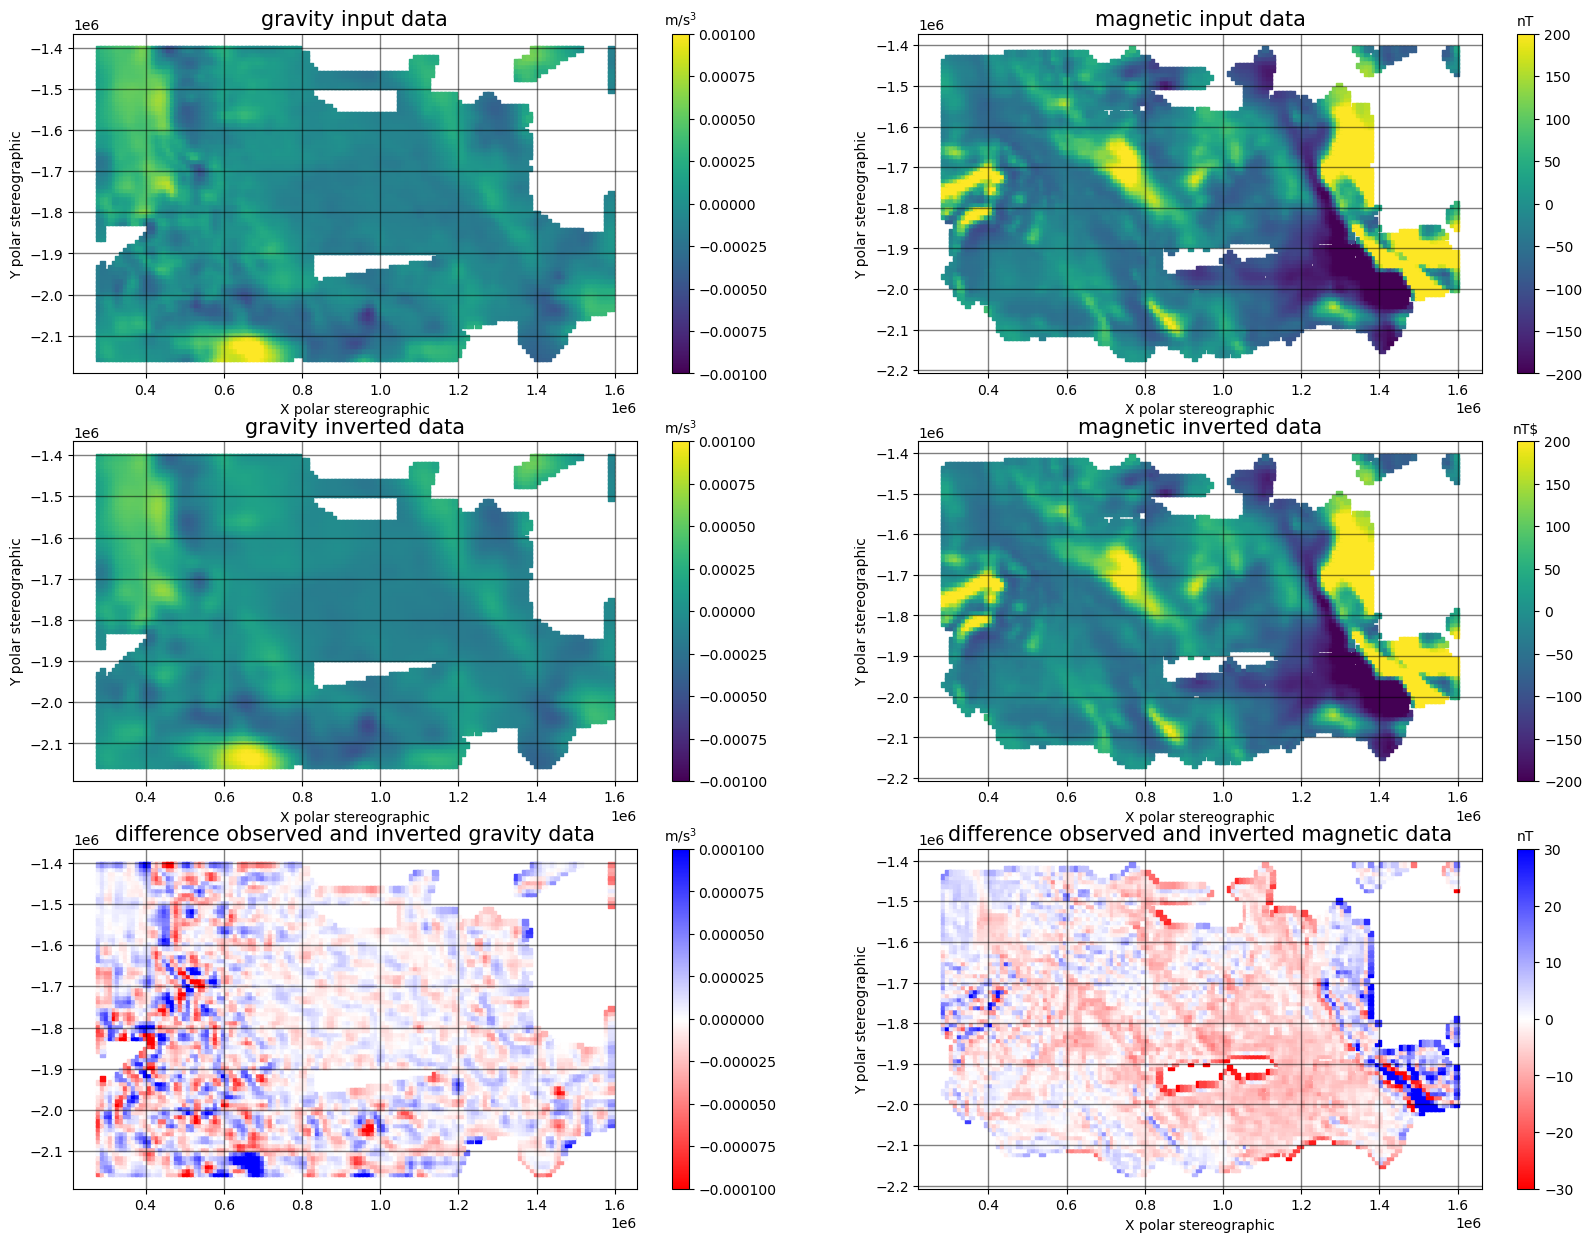

In [7]:
# plotting inverted gravity and magnetic field
figure1 = plt.figure(figsize=(20,15),facecolor='white')

# observed gravity
ax1 = plt.subplot(3, 2, 1)
im1 = plt.scatter( x_input_grav , y_input_grav , c=val_input_grav , marker='s', s=16, vmin = -100e-5 , vmax = 100e-5)
ax1.grid(color = 'k' , linestyle = '-', linewidth = 1 , alpha=.5)
cb1 = plt.colorbar(im1 , shrink=1 , orientation='vertical')
cb1.ax.set_title('m/s$^3$' ,fontsize=10)
ax1.set_xlabel('X polar stereographic' , fontsize=10)
ax1.set_ylabel('Y polar stereographic' , fontsize=10)
plt.title("gravity input data" , fontsize=15)

# observed magnetics
ax2 = plt.subplot(3, 2, 2)
im2 = plt.scatter( x_input_mag , y_input_mag , c=val_input_mag , marker='s', s=16 , vmin = -200 , vmax = 200)
ax2.grid(color = 'k' , linestyle = '-', linewidth = 1 , alpha=.5)
cb2 = plt.colorbar(im2 , shrink=1 , orientation='vertical')
cb2.ax.set_title('nT' ,fontsize=10)
ax2.set_xlabel('X polar stereographic' , fontsize=10)
ax2.set_ylabel('Y polar stereographic' , fontsize=10)
plt.title("magnetic input data" , fontsize=15)

# inverted gravity
ax3 = plt.subplot(3, 2, 3)
im3 = plt.scatter( x_inv_grav , y_inv_grav , c=val_inv_grav , marker='s', s=16, vmin = -100e-5 , vmax = 100e-5)
ax3.grid(color = 'k' , linestyle = '-', linewidth = 1 , alpha=.5)
cb3 = plt.colorbar(im3 , shrink=1 , orientation='vertical')
cb3.ax.set_title('m/s$^3$' ,fontsize=10)
ax3.set_xlabel('X polar stereographic' , fontsize=10)
ax3.set_ylabel('Y polar stereographic' , fontsize=10)
plt.title("gravity inverted data" , fontsize=15)

# inverted magnetics
ax4 = plt.subplot(3, 2, 4)
im4 = plt.scatter( x_inv_mag , y_inv_mag , c=val_inv_mag , marker='s', s=16, vmin = -200 , vmax = 200)
ax4.grid(color = 'k' , linestyle = '-', linewidth = 1 , alpha=.5)
cb4 = plt.colorbar(im4 , shrink=1 , orientation='vertical')
cb4.ax.set_title('nT$' ,fontsize=10)
ax4.set_xlabel('X polar stereographic' , fontsize=10)
ax4.set_ylabel('Y polar stereographic' , fontsize=10)
plt.title("magnetic inverted data" , fontsize=15)

# difference between observed and inverted gravity 
ax5 = plt.subplot(3, 2, 5)
im5 = plt.scatter(x_inv_grav , y_inv_grav , c=diff_grav , marker='s', s=16, cmap = 'bwr_r' , vmin = -10e-5 , vmax = 10e-5)
ax5.grid(color = 'k' , linestyle = '-', linewidth = 1 , alpha=.5)
cb3 = plt.colorbar(im5 , shrink=1 , orientation='vertical')
cb3.ax.set_title('m/s$^3$' ,fontsize=10)
ax3.set_xlabel('X polar stereographic' , fontsize=10)
ax3.set_ylabel('Y polar stereographic' , fontsize=10)
plt.title("difference observed and inverted gravity data" , fontsize=15)

# difference between observed and inverted magnetics
ax6 = plt.subplot(3, 2, 6)
im6 = plt.scatter( x_inv_mag , y_inv_mag , c=diff_mag , marker='s', s=16, cmap = 'bwr_r' , vmin = -30 , vmax = 30)
ax6.grid(color = 'k' , linestyle = '-', linewidth = 1 , alpha=.5)
cb6 = plt.colorbar(im6 , shrink=1 , orientation='vertical')
cb6.ax.set_title('nT' ,fontsize=10)
ax6.set_xlabel('X polar stereographic' , fontsize=10)
ax6.set_ylabel('Y polar stereographic' , fontsize=10)
plt.title("difference observed and inverted magnetic data" , fontsize=15)


In [8]:
# load inverted gravity field
inv_dens = nc4.Dataset('inv_density.nc') 
inv_dens

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: 3D density and susceptibility distribution of the Wilkes Subglacial Basin and Transantarctic Mountains in East Antarctica. - inverted density
    summary: We present a 3D crustal model of density and susceptibility distribution in the Wilkes Subglacial Basin and the Transantarctic Mountains (TAM) based on joint inversion of airborne gravity and magnetic data. The applied “variation of information” technique enforces a coupling between gravity and magnetic sources to give an enhanced inversion result. Our model reveals a large-scale body located in the interior of the Wilkes Subglacial Basin interpreted as a batholithic intrusive structure, as well as a linear dense body at the margin of the Terre Adélie Craton. We provide six netCDF files, which include the input gravity and magnetic data, the inverted gravity and magnetic data, and inverted crustal density and susceptibility distribution. 

In [9]:
# load inverted gravity field
inv_sus = nc4.Dataset('inv_susceptibility.nc') 
inv_sus

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: 3D density and susceptibility distribution of the Wilkes Subglacial Basin and Transantarctic Mountains in East Antarctica. - inverted crustal susceptibility distribution
    summary: We present a 3D crustal model of density and susceptibility distribution in the Wilkes Subglacial Basin and the Transantarctic Mountains (TAM) based on joint inversion of airborne gravity and magnetic data. The applied “variation of information” technique enforces a coupling between gravity and magnetic sources to give an enhanced inversion result. Our model reveals a large-scale body located in the interior of the Wilkes Subglacial Basin interpreted as a batholithic intrusive structure, as well as a linear dense body at the margin of the Terre Adélie Craton. We provide six netCDF files, which include the input gravity and magnetic data, the inverted gravity and magnetic data, and inverted crustal density and s

In [10]:
x_dens = inv_dens.variables['projection_x_coordinate'][:] # 1D array containing x coordiantes
y_dens = inv_dens.variables['projection_y_coordinate'][:] # 1D array containing y coordiantes
val_dens = inv_dens.variables['Density'][:]  # 3D array containing inverted density values

x_sus = inv_sus.variables['projection_x_coordinate'][:] # 1D array containing x coordiantes
y_sus = inv_sus.variables['projection_y_coordinate'][:] # 1D array containing y coordiantes
val_sus = inv_sus.variables['susceptibility'][:] # 3D array containing inverted susceptibility values
Depth_sus = inv_sus.variables['projection_z_coordinate'][:] # 1D array containing depths values in meter. Orientation postive equals down

In [11]:
# create 2D array for x and y coordiantes (mesh / grid)
xq , yq = np.meshgrid(x_dens , y_dens , indexing = 'xy') 

# define depth slice of horizontal layer to plot. Larger numbers = deeper, maximum 20 (nz-1)
depth_slice = 6 
print('depth slice at:' , Depth_sus[depth_slice] , 'meter')

depth slice at: 5488.0 meter


Text(0.5, 1.0, 'inverted susceptibility horizontal depth slice')

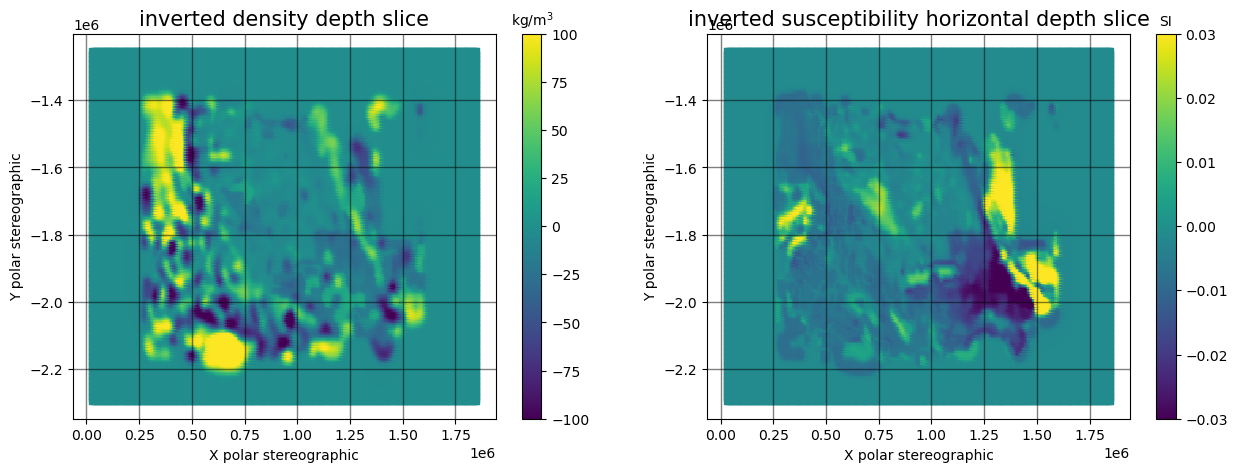

In [12]:
# plotting horizontal depth slice
figure1 = plt.figure(figsize=(15,5),facecolor='white')
ax1 = plt.subplot(1, 2, 1)
im1 = plt.scatter( xq , yq , c=val_dens[depth_slice,:,:] , marker='s', s=16 , vmin = -100 , vmax = 100)
ax1.grid(color = 'k' , linestyle = '-', linewidth = 1 , alpha=.5)
axes = plt.gca()
cb1 = plt.colorbar(im1 , shrink=1 , orientation='vertical')
cb1.ax.set_title('kg/m$^3$' ,fontsize=10)
ax1.set_xlabel('X polar stereographic' , fontsize=10)
ax1.set_ylabel('Y polar stereographic' , fontsize=10)
plt.title("inverted density depth slice" , fontsize=15)


ax2 = plt.subplot(1, 2, 2)
im2 = plt.scatter( xq , yq , c=val_sus[depth_slice,:,:] , marker='s', s=16 , vmin = -0.03 , vmax = 0.03)
ax2.grid(color = 'k' , linestyle = '-', linewidth = 1 , alpha=.5)
axes = plt.gca()
cb2 = plt.colorbar(im2 , shrink=1 , orientation='vertical')
cb2.ax.set_title('SI' ,fontsize=10)
ax2.set_xlabel('X polar stereographic' , fontsize=10)
ax2.set_ylabel('Y polar stereographic' , fontsize=10)
plt.title("inverted susceptibility horizontal depth slice" , fontsize=15)

In [13]:
# create 2D array for x and z coordiantes (mesh / grid)
x_profil , z_profil = np.meshgrid(x_sus,Depth_sus)

# Define profile index of cross section to plot. Large number = futher south, maximum 139 (ny-1)
y_profile_index = 75 

dens_profil_ix = val_dens[:,y_profile_index,:]
sus_profil_ix = val_sus[:,y_profile_index,:]


Text(0.5, 1.0, 'inverted susceptibility vertical depth slice')

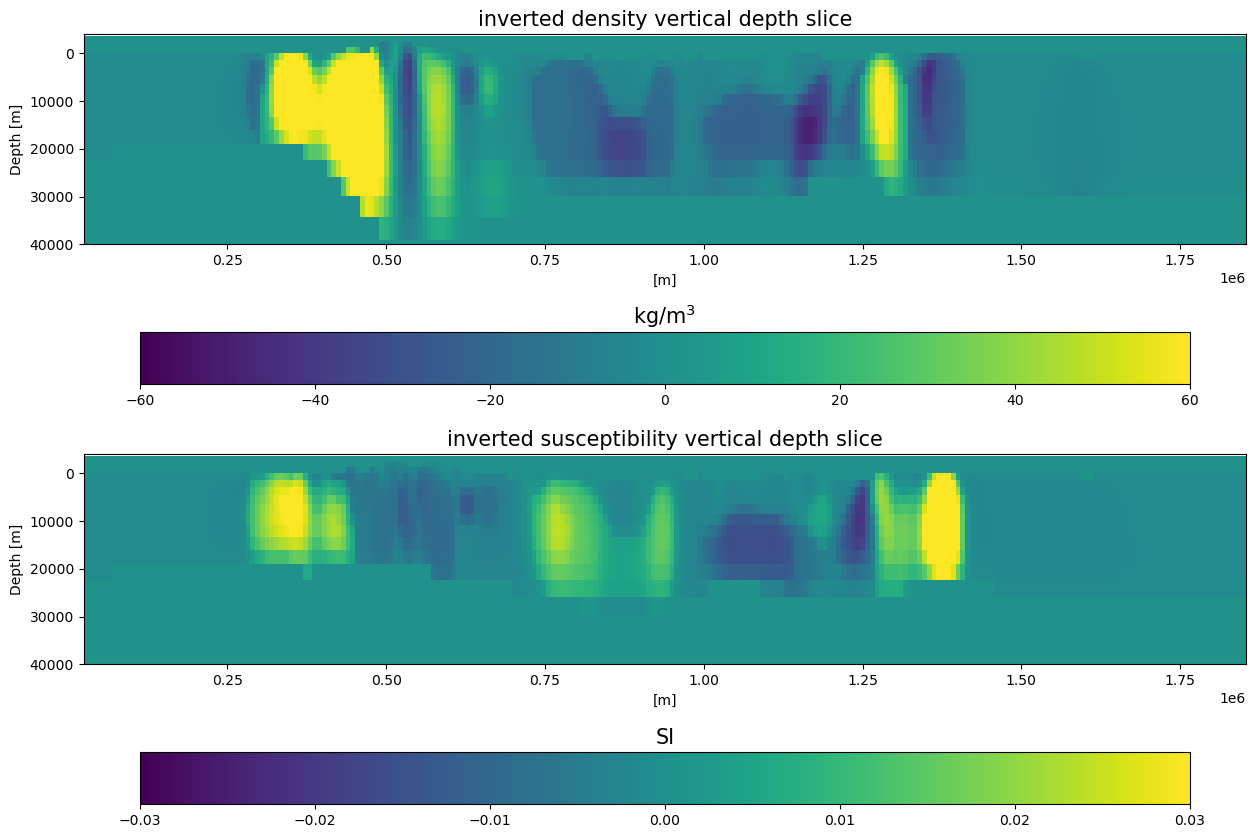

In [14]:
# plotting vertical depth slice
figure1 = plt.figure(figsize=(15,10),facecolor='white')
ax1 = plt.subplot(2, 1, 1)
im1 = plt.pcolormesh(x_profil , z_profil , dens_profil_ix , vmin=-60 , vmax=60 , shading='auto')
plt.xlabel('[m]', fontsize=10)
plt.ylabel('Depth [m]' , fontsize=10)
ax1.set_ylim([-4000 , 40000])
ax = plt.gca()
ax.invert_yaxis()
cb = plt.colorbar(im1 , shrink=1 , orientation='horizontal', pad=.25)
cb.ax.set_title('kg/m$^3$' ,fontsize=15)
plt.title("inverted density vertical depth slice" , fontsize=15)

ax2 = plt.subplot(2, 1, 2)
im2 = plt.pcolormesh(x_profil , z_profil , sus_profil_ix , vmin=-0.03 , vmax=0.03 , shading='auto')
plt.xlabel('[m]', fontsize=10)
plt.ylabel('Depth [m]' , fontsize=10)
ax2.set_ylim([-4000 , 40000])
ax = plt.gca()
ax.invert_yaxis()
cb = plt.colorbar(im2 , shrink=1 , orientation='horizontal', pad=.25)
cb.ax.set_title('SI' ,fontsize=15)
plt.title("inverted susceptibility vertical depth slice" , fontsize=15)